<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%cd /content/drive/MyDrive/DATA FOR AI/FACE/

/content/drive/MyDrive/DATA FOR AI/FACE


In [15]:
#Import các thư viện 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện liên quan CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np
#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)  # resize ảnh
# thiết lập dữ liệu train
training_set=train_data.flow_from_directory('/content/drive/MyDrive/DATA FOR AI/FACE/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
# truy xuất các class có trong data train
training_set.class_indices

Found 372 images belonging to 7 classes.


{'HoaiPhong': 0,
 'HongMinh': 1,
 'HuuLong': 2,
 'QuangHuy': 3,
 'TrongLuan': 4,
 'TrungHau': 5,
 'VietHa': 6}

In [18]:
#cấu trúc CNN model
model=Sequential()

# Nhân tích chập 32 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64  
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [19]:
#Complie
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=25,batch_size=128,verbose=1)

Epoch 1/25
12/12 [==============================] - 34s 3s/step - loss: 10.0849 - accuracy: 0.3145
Epoch 2/25
12/12 [==============================] - 2s 198ms/step - loss: 0.5760 - accuracy: 0.8522
Epoch 3/25
12/12 [==============================] - 3s 262ms/step - loss: 0.1567 - accuracy: 0.9409
Epoch 4/25
12/12 [==============================] - 2s 195ms/step - loss: 0.0688 - accuracy: 0.9866
Epoch 5/25
12/12 [==============================] - 2s 197ms/step - loss: 0.0462 - accuracy: 0.9946
Epoch 6/25
12/12 [==============================] - 2s 196ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 7/25
12/12 [==============================] - 3s 237ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 8/25
12/12 [==============================] - 3s 250ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/25
12/12 [==============================] - 2s 198ms/step - loss: 0.0091 - accuracy: 0.9946
Epoch 10/25
12/12 [==============================] - 2s 207ms/step - loss: 0.0070 - accuracy: 1.0000


Train_Loss 0.0014542961725965142
Train_Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

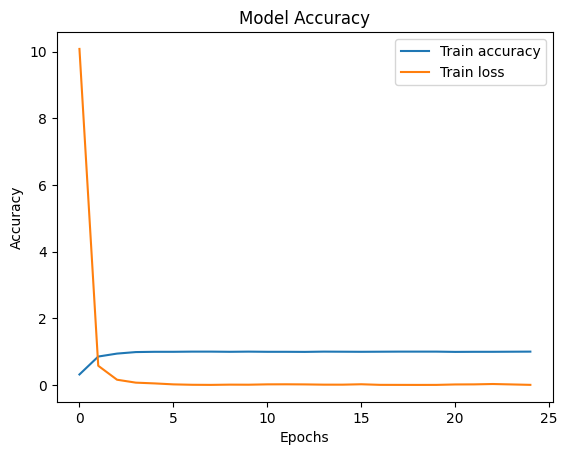

In [20]:
#Độ chính xác 
Score=model.evaluate(training_set,verbose=0)
print('Train_Loss', Score[0])
print('Train_Accuracy', Score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [21]:
model.save("face.h5")

In [25]:
model_CNN=load_model('face.h5')



1/1 [==============================] - 0s 277ms/step
TrongLuan


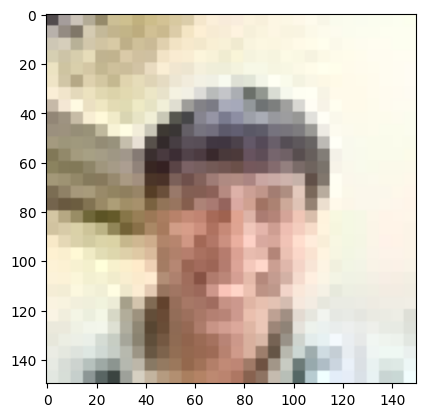

In [34]:
test='/content/drive/MyDrive/DATA FOR AI/FACE/Test/Luan55.jpg' 
img=load_img(test,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
  
result = int(np.argmax(model_CNN.predict(img),axis =1))

class_name=['HoaiPhong','HongMinh','HuuLong','QuangHuy','TrongLuan','TrungHau','VietHa']

print(class_name[result])
plt.show()

1/1 [==============================] - 0s 18ms/step
TrungHau


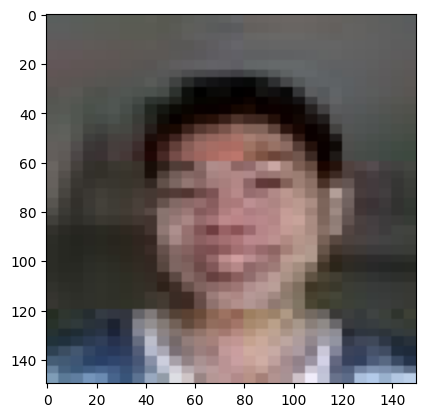

In [35]:
test='/content/drive/MyDrive/DATA FOR AI/FACE/Test/hau5.jpg' 
img=load_img(test,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
  
result = int(np.argmax(model_CNN.predict(img),axis =1))

class_name=['HoaiPhong','HongMinh','HuuLong','QuangHuy','TrongLuan','TrungHau','VietHa']

print(class_name[result])
plt.show()